# AUTHOR :- VINAY KUMAR KUSHWAHA

## THE SPARK FOUNDATION #(GRIPMAY'22)

## TASK2 :- Prediction using Unsupervised ML


In this task we wil predict the optimum number of clusters by using Iris dataset.
To solve this problem we will use K-means is involved in this given dataset. 
Dataset_URL = "https://bit.ly/3kXTdox"

## Step 1 - IMPORTING THE DATASET AND REQUIRED LIBRARIES..

In [294]:
#Importing the dataset and required libraries..
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [295]:
# Importing the iris dataset
from sklearn.datasets import load_iris
iris1 = load_iris()
iris = pd.DataFrame(iris1.data , columns= iris1.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### STEP-2 EXPLORING THE DATASET

We will study about iris data..

In [296]:
#Observing the First 5 values
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [297]:
#Observing the last 5 values
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [298]:
#For infomation regarding dataset
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [299]:
#For finding row and columns
iris.shape

(150, 4)

In [300]:
#To check the duplicate values
iris.duplicated().sum()

1

In [301]:
#To check the missing values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### STEP-3 VISUALING THE DATASET

In this step we will observe the relationship between variables..

<function matplotlib.pyplot.show(close=None, block=None)>

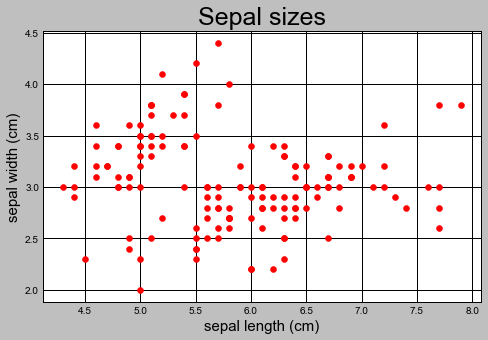

In [313]:
#Visualising relation between features "sepals"
plt.style.use('grayscale')
plt.rcParams["figure.figsize"]= [7,5]
plt.scatter(x= 'sepal length (cm)', y='sepal width (cm)', data=iris, color='r')
plt.title('Sepal sizes', fontsize=25)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

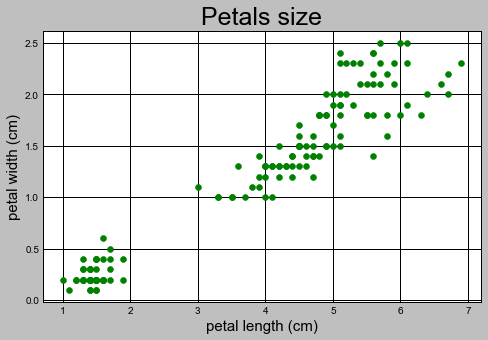

In [314]:
#Visualising relation between features "petals"
plt.rcParams["figure.figsize"]= [7,5]
plt.scatter(x= 'petal length (cm)', y='petal width (cm)', data=iris, color='g')
plt.title('Petals size', fontsize=25)
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show

In [288]:
#Correlation matrices between the features petals and sepals length..
#pearson coefficient is used to summarize the strength of linear relation between two variables

iris.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### STEP-4 APPLYING K-MEANS CLASSIFICATION ON THE DATA

We will use "Elbow method" and "silhouette method" to find the optimum no. of clusters..

In [305]:
# Finding the optimum number of clusters in the data using "Elbow Method"

from sklearn.cluster import KMeans

# Within cluster sum of squares
Sum_of_squared_distances = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(iris)
    Sum_of_squared_distances.append(kmeans.inertia_)


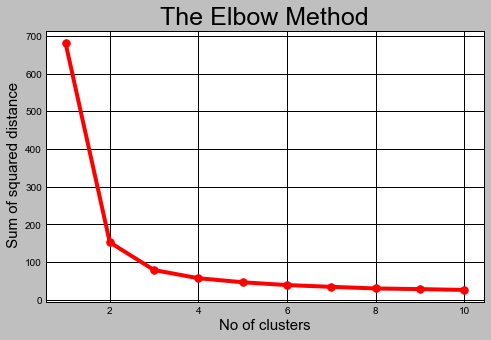

In [306]:
# Plotting the results onto a line graph in order to observe the elbow.

clusters = range(1,11)
plt.rcParams["figure.figsize"]= [7,5]
plt.style.use('grayscale')
plt.plot(clusters,  Sum_of_squared_distances, marker='.', color="r", markersize=15 )
plt.title('The Elbow Method', fontsize=25)
plt.xlabel('No of clusters', fontsize=15 )
plt.ylabel(' Sum of squared distance', fontsize=15)

plt.show()

In [307]:
# Finding the optimum number of clusters in the data using "Silhouette Method"

from sklearn.metrics import silhouette_score
x= iris.iloc[:,[0,1,2,3]].values

silhouette_avg = []
for j in range(2,11):
 
 # initialise kmeans

  kmeans = KMeans(n_clusters=j, random_state=0)
  kmeans.fit(x)
  silhouette_avg.append([j,silhouette_score(x, kmeans.labels_)])


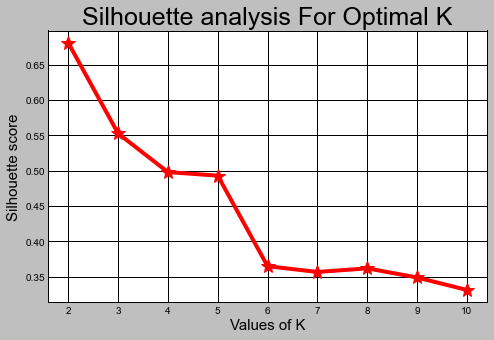

In [257]:
# Plotting the results onto a line graph in order to observe the Silhouette.

plt.rcParams["figure.figsize"]= [7,5]
plt.style.use('grayscale')
plt.plot(pd.DataFrame(silhouette_avg)[0],pd.DataFrame(silhouette_avg)[1], marker='*', color="r", markersize=15)
plt.grid()
plt.title('Silhouette analysis For Optimal K', fontsize=25)
plt.xlabel('Values of K', fontsize=15 )
plt.ylabel('Silhouette score', fontsize=15)
plt.grid()
plt.show()


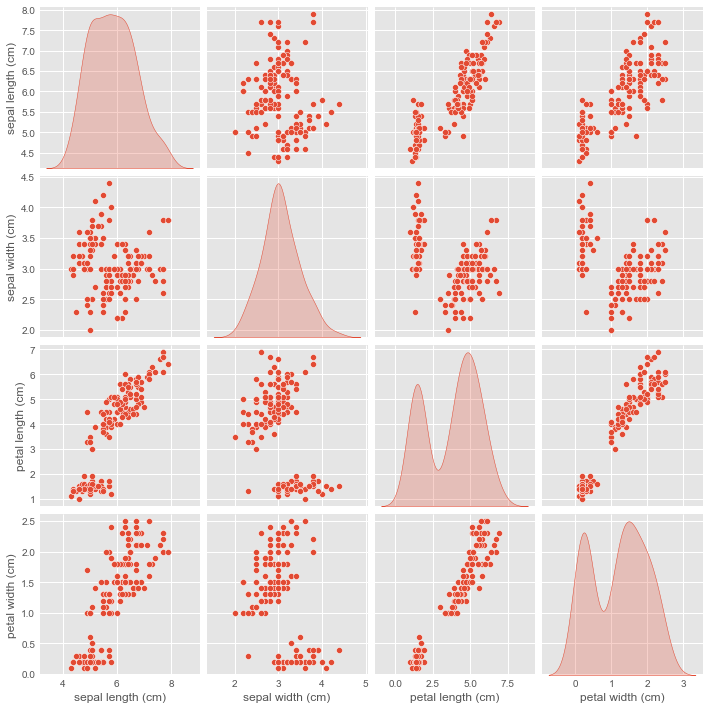

In [308]:
#Visualizing the relationship between each features using seaborn
plt.style.use('ggplot')
sns.pairplot(data=iris, diag_kind='kde')


### STEP-5 USING K-MEANS FOR PREDICTION..

In [309]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 0)
prediction = kmeans.fit_predict(x)

### STEP-6 VISUALING THE CLUSTERS..

We will observe the clusters based on sepals length and sepals width in first figure;



and In second figure we will visualize clusters based on petals lenth and petal width..

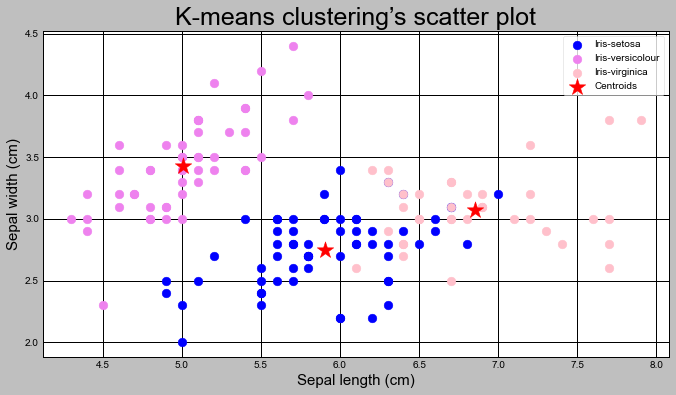

In [312]:
# Visualising the clusters (based on the sepals length and sepals width)

plt.rcParams["figure.figsize"]= [10,6]
plt.scatter(x[prediction == 0,0], x[prediction == 0,1], s = 75, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[prediction == 1,0], x[prediction == 1,1], s = 75, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[prediction == 2,0], x[prediction == 2,1], s = 75, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = 'red', label = 'Centroids', marker='*')
plt.title("K-means clustering’s scatter plot", fontsize=25)
plt.xlabel('Sepal length (cm)', fontsize=15)
plt.ylabel('Sepal width (cm)', fontsize=15)

plt.legend()
plt.show()

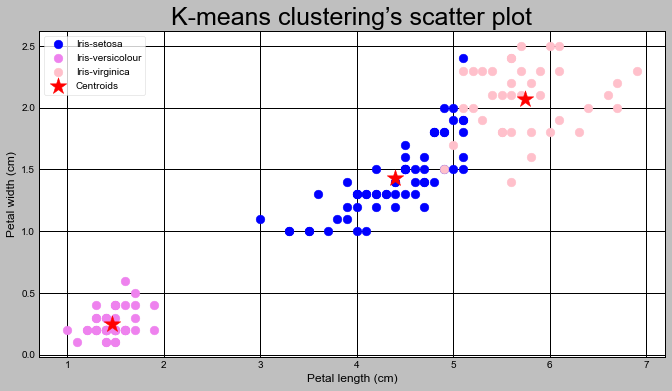

In [311]:
# Visualising the clusters (based on the Petals length and Petals width)
plt.rcParams["figure.figsize"]= [10,6]

plt.scatter(x[prediction == 0,2], x[prediction == 0,3], s = 75, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[prediction == 1,2], x[prediction == 1,3], s = 75, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[prediction == 2,2], x[prediction == 2,3], s = 75, c = 'pink', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 300, c = 'red', label = 'Centroids', marker='*')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title("K-means clustering’s scatter plot", fontsize=25)

plt.legend()
plt.show()

# CONCLUSION:-

### By applying K-means(k=3) we can say that this model is appropriate. 

### By visualizing the clusters, we observe clusters are more far in sepals while clusters are more classified in petals.


### So, We can say K-means classification are better in petals than sepals.